In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IT Sector /csv files/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'].value_counts()
# since their are 3 type of speices for prediction we use multi classification method

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
# since species is given in string format we have to convert it into number format

In [ ]:
df['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [ ]:
y=df['species']
X=df.drop('species',axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
# stratify splits data in such a way that their are equal no. of 2,1,0 in testing data and also in training data

In [ ]:
y_test.value_counts()

2    15
1    15
0    15
Name: species, dtype: int64

In [ ]:
y_train.value_counts()

2    35
1    35
0    35
Name: species, dtype: int64

In [ ]:
# Standard Scaler

In [ ]:
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)


In [ ]:
# Neural Network
# softmax activation functn used in 3 rd layer with 3 neurons for 3 type of output

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Dense(2,activation='relu',input_shape=(X.shape[1],)),
                           tf.keras.layers.Dense(3,activation='relu'),
                           tf.keras.layers.Dense(3,activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [ ]:
trained_model=model.fit(X_train_ss,y_train,epochs=30,batch_size=10)

Epoch 1/30
11/11 [==============================] - 0s 2ms/step - loss: 0.7413
Epoch 2/30
11/11 [==============================] - 0s 2ms/step - loss: 0.7344
Epoch 3/30
11/11 [==============================] - 0s 2ms/step - loss: 0.7279
Epoch 4/30
11/11 [==============================] - 0s 2ms/step - loss: 0.7216
Epoch 5/30
11/11 [==============================] - 0s 2ms/step - loss: 0.7155
Epoch 6/30
11/11 [==============================] - 0s 2ms/step - loss: 0.7097
Epoch 7/30
11/11 [==============================] - 0s 2ms/step - loss: 0.7040
Epoch 8/30
11/11 [==============================] - 0s 2ms/step - loss: 0.6987
Epoch 9/30
11/11 [==============================] - 0s 2ms/step - loss: 0.6935
Epoch 10/30
11/11 [==============================] - 0s 2ms/step - loss: 0.6886
Epoch 11/30
11/11 [==============================] - 0s 2ms/step - loss: 0.6838
Epoch 12/30
11/11 [==============================] - 0s 2ms/step - loss: 0.6794
Epoch 13/30
11/11 [==============================

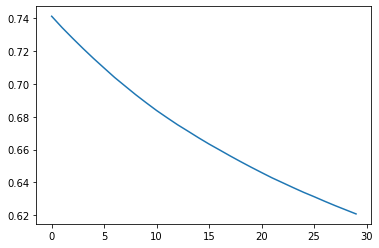

In [ ]:
plt.plot(trained_model.history['loss'])

In [ ]:
# Testing

In [ ]:
y_pred=model.predict(X_test_ss)

In [ ]:
y_pred 
# since in depp learning model y value is provided in probability form and not in 0 & 1, which is diff from ML model

array([[0.22149391, 0.40002936, 0.37847674],
       [0.9891046 , 0.00614387, 0.00475151],
       [0.98263365, 0.00972204, 0.0076442 ],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.99391633, 0.00346131, 0.0026224 ],
       [0.99761885, 0.00137391, 0.00100716],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.94210315, 0.02489648, 0.0330004 ],
       [0.29813194, 0.33067858, 0.37118948],
       [0.9712053 , 0.01599138, 0.01280333],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.1909039 , 0.41442603, 0.39467007],
       [0.94768316, 0.02421692, 0.02809996],
       [0.

In [ ]:
y_pred=y_pred.argmax(axis=1)
# argmax cosniders the highest value among 3 neurons of output and assigns it as 1

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.46      0.87      0.60        15
           2       0.00      0.00      0.00        15

    accuracy                           0.62        45
   macro avg       0.49      0.62      0.53        45
weighted avg       0.49      0.62      0.53        45

